# PROJECT 5.1: PREDICT THE HOUSE PRICE BASED ON FEATURES
## `PART 1: DATA EXTRACTION, DISTRIBUTION & ANALYSIS`

## 1. PREPARING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_dataset = pd.read_csv("../dataset/train-house-prices-advanced-regression-techniques.csv")
raw_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
feature_names = raw_dataset.columns
print(f"👉 dataset shape: {raw_dataset.shape[0]}")
# print("👉 feature_names: \n", feature_names)

👉 dataset shape: 1460


In [4]:
null_summary = raw_dataset.isnull().sum()
na_summary = raw_dataset.isna().sum()
print(null_summary[null_summary > 0].sort_values(ascending=False))
# print(na_summary[na_summary > 0].sort_values(ascending=False))

# find the feature with more than 50% na
drop_feature = null_summary[null_summary > 0.5 * raw_dataset.shape[0]].index.tolist()
print(drop_feature)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
reduced_dataset = raw_dataset.drop(drop_feature, axis=1)

# Covert index to "ID"
reduced_dataset = reduced_dataset.set_index("Id")
reduced_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## 2. NORMALIZE THE REDUCED DATASET

In [6]:
# Filter the numberical_cols and categorical_cols
numerical_features = reduced_dataset.iloc[:, :-1].select_dtypes(include="number").columns.tolist()
categorical_features = reduced_dataset.iloc[:, :-1].select_dtypes(include="object").columns.tolist()
print(f"👉 numerical features: \n{numerical_features}")
print(f"👉 categorical features: \n{categorical_features}")

👉 numerical features: 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
👉 categorical features: 
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',

In [7]:
# Set pipeline to average the data
reduced_dataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


View the distribution of sale prices:
* Recognize that the price has left tail, right skewed >> it means the price of this area is concentrated to low and average price
* OUtliers have very high value (high price)
* The sale price shall need to be preprocessing (log transform) before modeling: `df['SalePrice_log'] = np.log(df['SalePrice'])` >> Việc này làm giảm ảnh hưởng của Outler do giá trị của Outlier giá quá cao giúp cho đường skewness ít lệch hơn về bên phải
* Outliers handling: must be consider the case of high price house


Text(0.5, 1.0, 'Sales Price Distribution')

<Figure size 2000x1000 with 0 Axes>

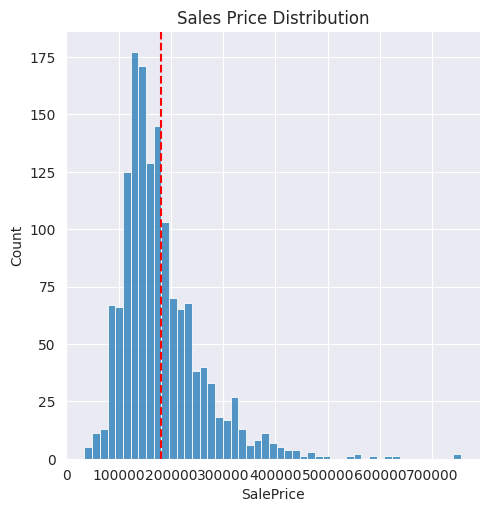

In [8]:
plt.figure(figsize=(20, 10))
sns.displot(reduced_dataset["SalePrice"])
plt.axvline(x=reduced_dataset["SalePrice"].mean(), linestyle="dashed", color="red")
plt.title("Sales Price Distribution")

#### IMPORTANT NOTE
Do dữ liệu có outlier lớn, do đó việc chuẩn đoán dữ liệu cần log hóa giá trị sale prices, tuy nhiên khi sử dụng cần nhớ:
* Khi thực hiện Technical Work => Sử dụng Log scale
* Khi thực hiện xong và thực hiện prediction: convert ngược lại: `prediction_corrected = np.exp(log_pred + 0.5* mse_log)`

### FIND OUT 8 IMPORTANT NUMERICAL FEATURES BASE ON CORRELATION

<Axes: >

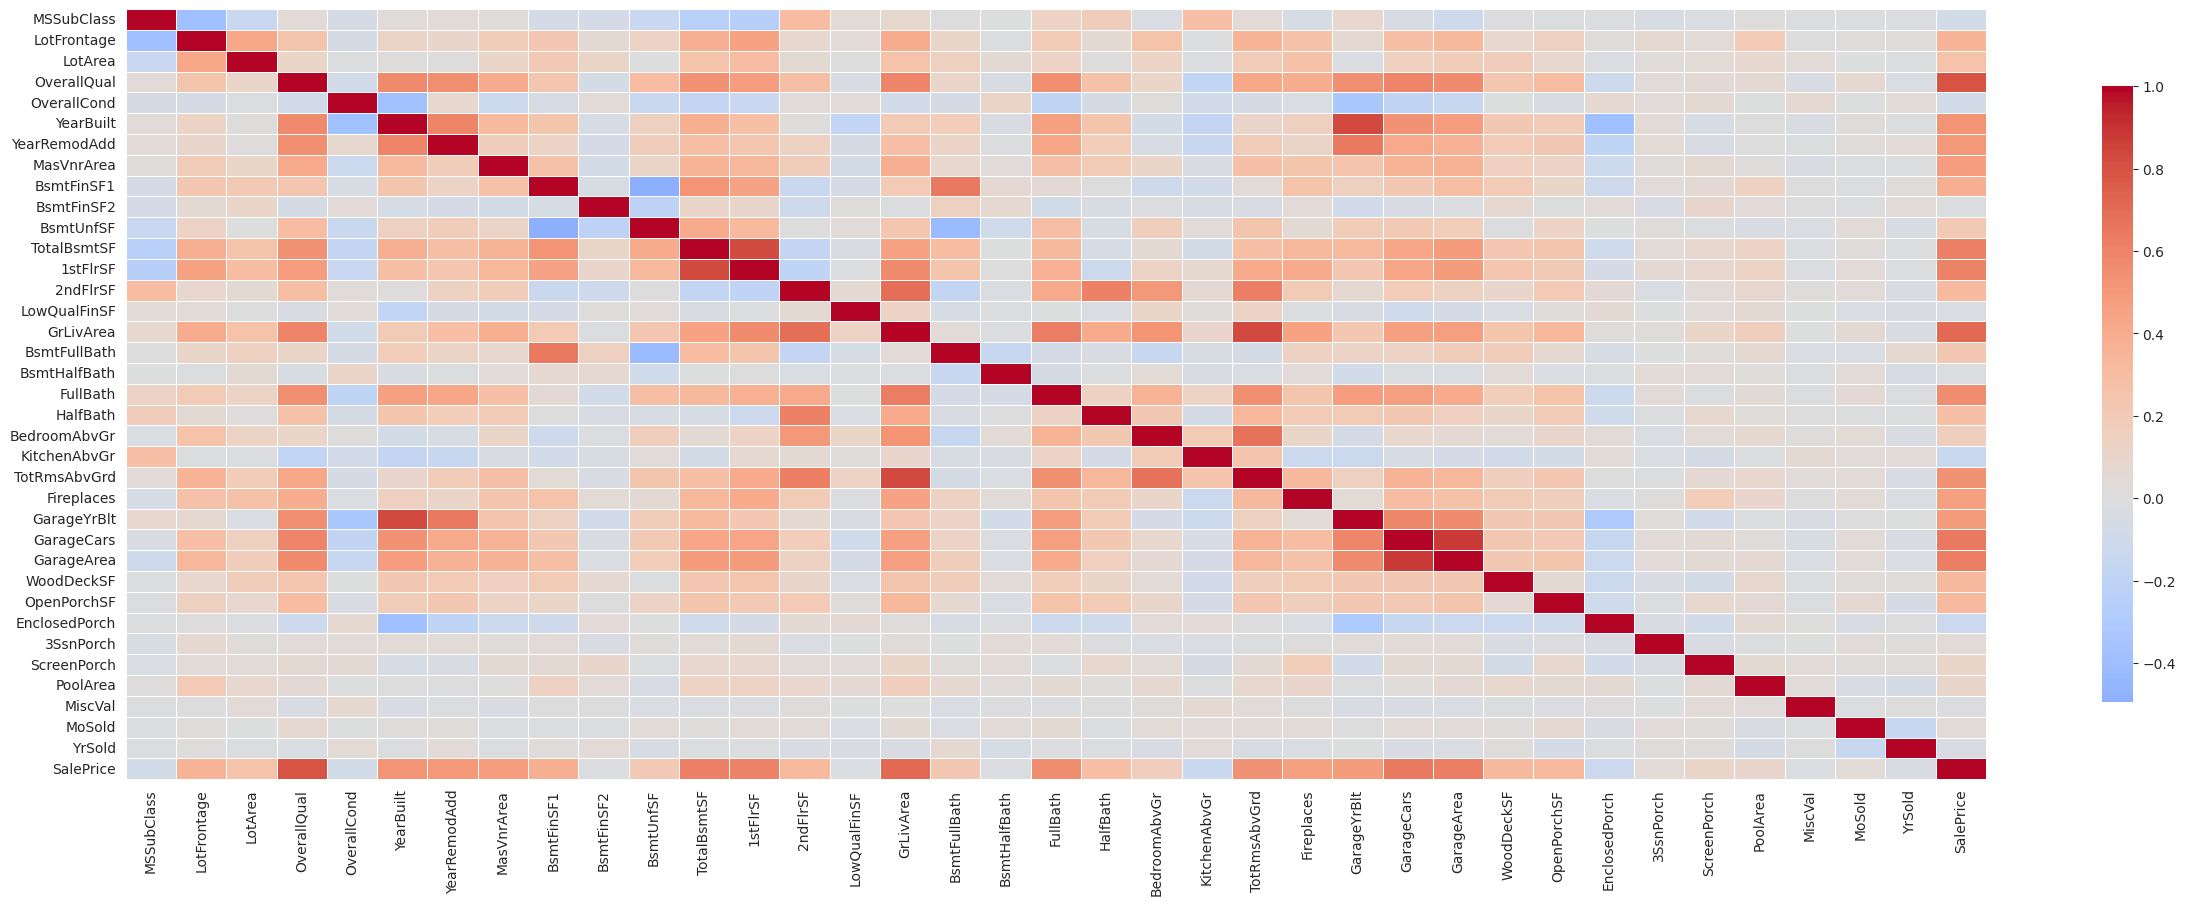

In [15]:
plt.figure(figsize=(30, 10))
sns.heatmap(
    reduced_dataset.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)

## 3. PERFORM SPLIT DATASET AND STANDARDIZATION

In [9]:
reduced_dataset.iloc[:, :-1].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_dataset.iloc[:, :-1], reduced_dataset.iloc[:, -1], test_size=0.2, random_state=42)
print(f"👉 shape X_train: {X_train.shape}")
print(f"👉 shape X_test: {X_test.shape}")

👉 shape X_train: (1168, 74)
👉 shape X_test: (292, 74)


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numerical_ppl = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_ppl = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocessing = ColumnTransformer([
    ("numerical", numerical_ppl, numerical_features),
    ("categorical", categorical_ppl, categorical_features),
])

features_after_processing = []
X_train_prep = preprocessing.fit_transform(X_train)
X_test_prep = preprocessing.transform(X_test)

# Collect feature name from Column transfomer
for c in preprocessing.get_feature_names_out():
    features_after_processing.append(list(c.replace("__", " ").split())[1])

print("👉 features after processing:")
print(features_after_processing[:10])

# Combine to X_test & X_train
X_train_prep_df = pd.DataFrame(X_train_prep, columns=features_after_processing, index=X_train.index)
X_test_prep_df = pd.DataFrame(X_test_prep, columns=features_after_processing, index=X_test.index)

# Check the index of X_train & y_train after preprocessing
(X_train_prep_df.index == y_train.index).all()

👉 features after processing:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']


np.True_

<Figure size 2000x1000 with 0 Axes>

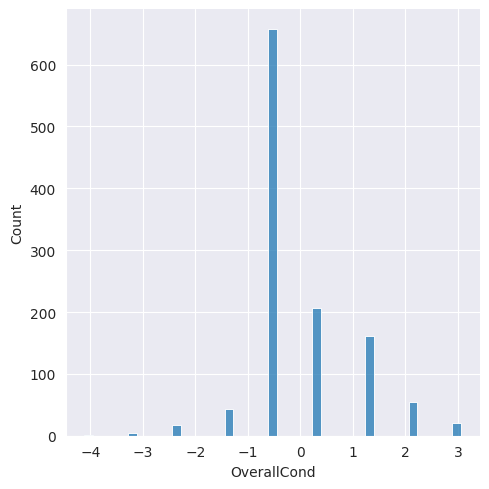

In [12]:
plt.figure(figsize=(20, 10))
sns.displot(X_train_prep_df["OverallCond"], kde=False)

## 4. CREAT DATAFRAME THEN EXPORT TO CSV

In [13]:
# Check X_train_prep_df
X_train_prep_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
255,-0.866764,-0.012468,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,-0.597889,1.037269,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1067,0.074110,-0.502357,-0.265245,-0.088934,1.268609,0.718609,0.439214,-0.597889,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
639,-0.631546,-0.146074,-0.177841,-0.820445,1.268609,-1.988293,-1.683818,-0.597889,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
800,-0.161109,-0.457822,-0.324474,-0.820445,1.268609,-1.107734,-1.683818,0.861522,0.267995,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
381,-0.161109,-0.903175,-0.529035,-0.820445,0.372217,-1.531707,-1.683818,-0.597889,-0.496920,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
304,-0.866764,-0.012468,-0.082721,-0.820445,1.268609,0.033730,-0.622302,-0.597889,0.976250,-0.285504,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
87,0.074110,2.303368,0.113564,-0.088934,-0.524174,1.109968,0.969972,-0.597889,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1386,-0.161109,-1.348528,-0.488495,-1.551955,2.165000,-1.596934,1.066473,-0.597889,0.629750,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
266,-0.866764,0.343814,0.130208,-0.088934,0.372217,0.327250,-0.188046,0.618287,0.309401,1.156167,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
train_df = pd.concat([X_train_prep_df, y_train], axis=1)
test_df = pd.concat([X_test_prep_df, y_test], axis=1)

dir_path = "../dataset"
train_df.to_csv(f"{dir_path}/train.csv", index=True)
test_df.to_csv(f"{dir_path}/test.csv", index=True)
print("✅ Save preprocessing dataset to train, test csv files successfully")

✅ Save preprocessing dataset to train, test csv files successfully
